###Create Time Series

In [22]:
# generating data
mydata = runif(n = 500, min = 10, max = 45)
summary(mydata)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  10.06   19.10   28.17   27.86   37.18   44.99 

In [23]:
# ts for class time series
mytimeseries = ts(data = mydata, start = 1961, frequency = 52)
mytimeseries

Time Series:
Start = c(1961, 1) 
End = c(1970, 32) 
Frequency = 52 
  [1] 19.61688 11.92527 39.12992 33.70718 41.59451 10.63719 31.76920 31.68765
  [9] 12.15780 32.80371 36.57942 29.42361 44.91701 35.67899 28.15268 33.77694
 [17] 40.93268 38.19238 44.27977 13.55319 32.68648 13.46561 25.49128 29.49378
 [25] 37.99144 41.14616 19.71462 34.76370 38.93966 17.98753 21.08663 12.24180
 [33] 27.53164 11.34408 40.04256 22.53400 39.50049 32.53575 32.10566 26.06331
 [41] 34.09648 37.19269 43.43843 29.18109 41.83956 14.22987 20.23816 22.86424
 [49] 29.02056 42.27738 38.98052 41.01014 35.19360 12.07813 41.59059 14.02562
 [57] 19.27630 35.61704 13.08962 14.27750 14.11439 39.24424 14.37314 32.22575
 [65] 35.27029 16.06419 37.54962 24.54411 29.47994 12.89999 11.73469 35.88440
 [73] 13.76455 32.06085 22.61149 12.36226 42.61569 37.01616 17.83108 37.05763
 [81] 27.06236 32.22075 24.76986 38.57183 34.71071 40.55669 21.59091 34.24852
 [89] 10.63374 26.41373 28.45421 41.33317 23.11345 20.52215 38.48484 35.14

In [24]:
### Stationarity
library(tseries)
## Null Hypothesis Non Stationary
## Alternative Hypothesis: Stationary
adf.test(mytimeseries)

Warning message:
In adf.test(mytimeseries): p-value smaller than printed p-value


	Augmented Dickey-Fuller Test

data:  mytimeseries
Dickey-Fuller = -8.0654, Lag order = 7, p-value = 0.01
alternative hypothesis: stationary


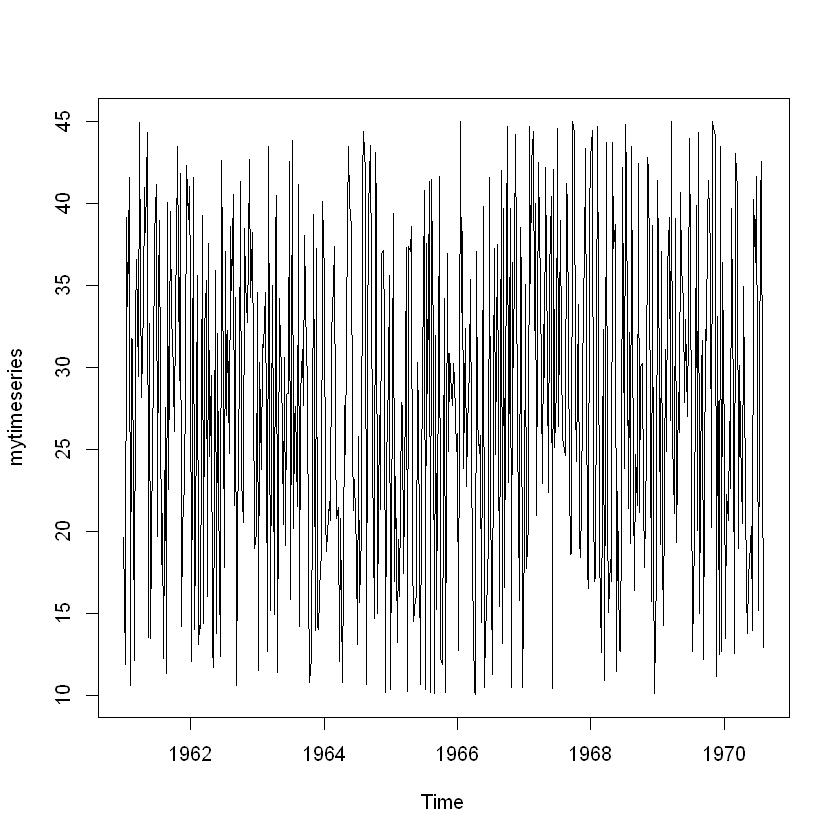

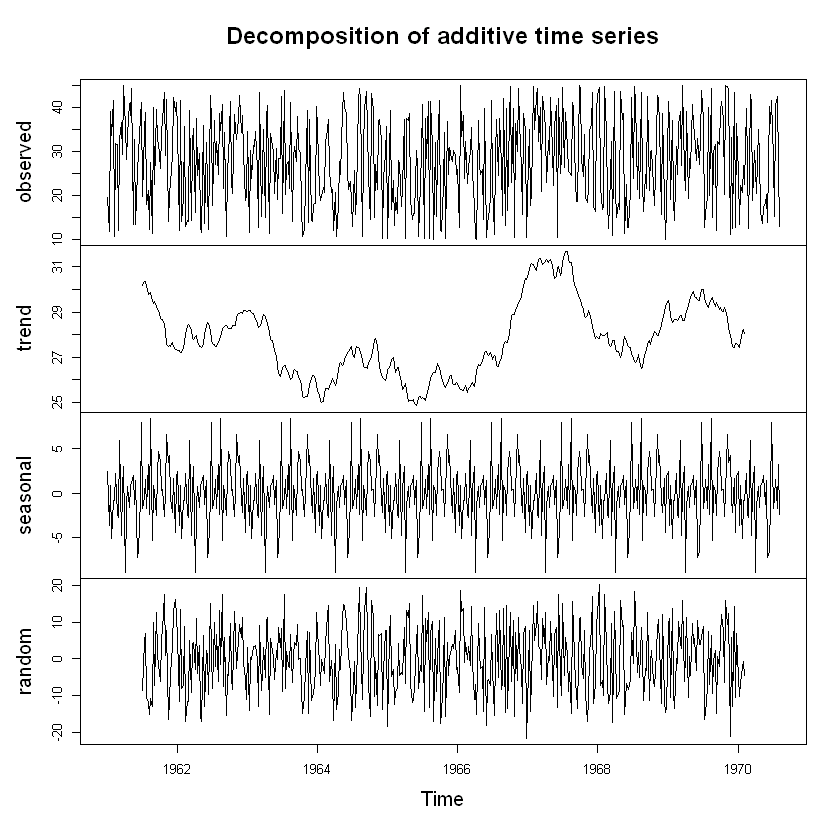

In [25]:
plot(mytimeseries) 
plot(decompose(mytimeseries))

In [26]:
### Autocorrelation (Do previous observation influnece the recent)
##Lags - stepson a time scale
# Durbin Watson test for autocorrelation.  
## Null Hypothesis: No autocorrelation 
## Alternative Hypothesis: There is autocorrelation
# Only tests 1 time period  Use with caution
library(lmtest)
dwtest(mydata[-500] ~ mydata[-1])


	Durbin-Watson test

data:  mydata[-500] ~ mydata[-1]
DW = 1.9988, p-value = 0.4948
alternative hypothesis: true autocorrelation is greater than 0


In [27]:
decompose(mytimeseries, "additive") # decompose is in R base

$x
Time Series:
Start = c(1961, 1) 
End = c(1970, 32) 
Frequency = 52 
  [1] 19.61688 11.92527 39.12992 33.70718 41.59451 10.63719 31.76920 31.68765
  [9] 12.15780 32.80371 36.57942 29.42361 44.91701 35.67899 28.15268 33.77694
 [17] 40.93268 38.19238 44.27977 13.55319 32.68648 13.46561 25.49128 29.49378
 [25] 37.99144 41.14616 19.71462 34.76370 38.93966 17.98753 21.08663 12.24180
 [33] 27.53164 11.34408 40.04256 22.53400 39.50049 32.53575 32.10566 26.06331
 [41] 34.09648 37.19269 43.43843 29.18109 41.83956 14.22987 20.23816 22.86424
 [49] 29.02056 42.27738 38.98052 41.01014 35.19360 12.07813 41.59059 14.02562
 [57] 19.27630 35.61704 13.08962 14.27750 14.11439 39.24424 14.37314 32.22575
 [65] 35.27029 16.06419 37.54962 24.54411 29.47994 12.89999 11.73469 35.88440
 [73] 13.76455 32.06085 22.61149 12.36226 42.61569 37.01616 17.83108 37.05763
 [81] 27.06236 32.22075 24.76986 38.57183 34.71071 40.55669 21.59091 34.24852
 [89] 10.63374 26.41373 28.45421 41.33317 23.11345 20.52215 38.48484 35

Warning message:
: package 'forecast' was built under R version 3.2.2Loading required package: timeDate
This is forecast 6.2 



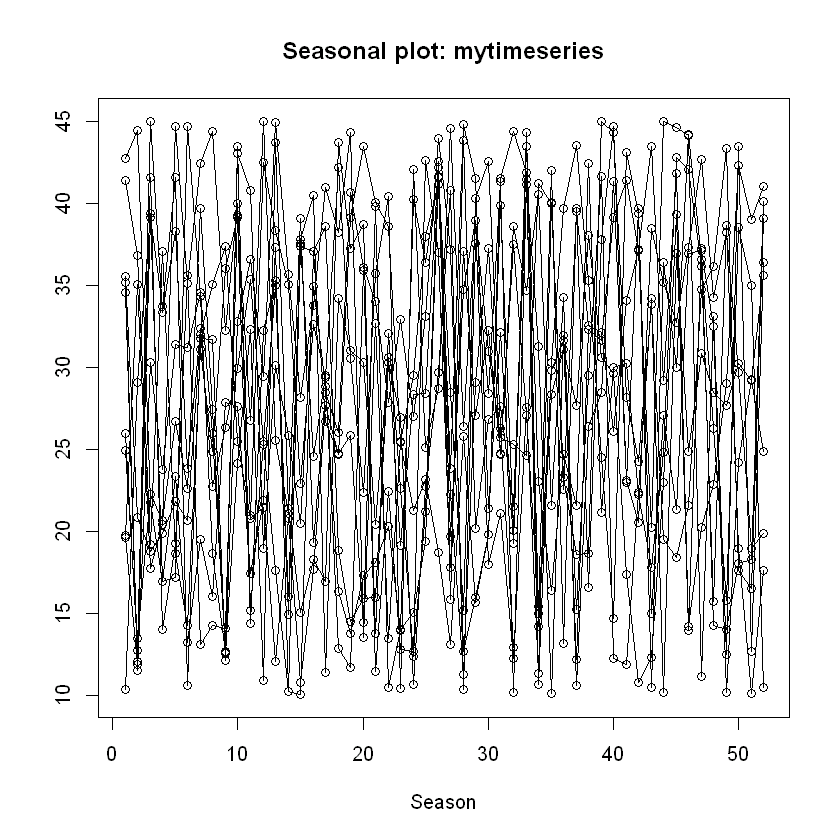

In [28]:
# package forecast has a useful plot functionality for seasonal data
library(forecast)
seasonplot(mytimeseries)

In [35]:
### ARIMA Basics - example lynx
auto.arima(mytimeseries, ic = "aic", trace = T) # arguments ic and trace to improve the output
myarima <- auto.arima(mytimeseries, ic = "aic") 


 ARIMA(2,0,2)(1,0,1)[52] with non-zero mean : 3764.639
 ARIMA(0,0,0) with non-zero mean : 3762.007
 ARIMA(1,0,0)(1,0,0)[52] with non-zero mean : 3764.413
 ARIMA(0,0,1)(0,0,1)[52] with non-zero mean : 3764.479
 ARIMA(0,0,0) with zero mean     : 4812.885
 ARIMA(0,0,0)(1,0,0)[52] with non-zero mean : 3762.085
 ARIMA(0,0,0)(0,0,1)[52] with non-zero mean : 3762.553
 ARIMA(0,0,0)(1,0,1)[52] with non-zero mean : 3761.913
 ARIMA(1,0,0)(1,0,1)[52] with non-zero mean : 3764.674
 ARIMA(0,0,1)(1,0,1)[52] with non-zero mean : 3763.727
 ARIMA(1,0,1)(1,0,1)[52] with non-zero mean : 3764.936
 ARIMA(0,0,0)(1,0,1)[52] with zero mean     : Inf
 ARIMA(0,0,0)(2,0,1)[52] with non-zero mean : Inf
 ARIMA(0,0,0)(1,0,2)[52] with non-zero mean : 3762.616
 ARIMA(0,0,0)(2,0,2)[52] with non-zero mean : 3767.997

 Best model: ARIMA(0,0,0)(1,0,1)[52] with non-zero mean 



Series: mytimeseries 
ARIMA(0,0,0)(1,0,1)[52] with non-zero mean 

Coefficients:
        sar1     sma1  intercept
      0.1319  -0.1903    27.8391
s.e.  0.6068   0.6032     0.4360

sigma^2 estimated as 107.2:  log likelihood=-1878.25
AIC=3764.49   AICc=3764.57   BIC=3781.35

In [37]:
## Forecast using the arima model developed above
forecast.Arima(myarima, h = 10) # forecasting procedure

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
1970.615       26.70820 13.43908 39.97731 6.414839 47.00155
1970.635       28.62124 15.35212 41.89035 8.327879 48.91459
1970.654       27.82246 14.55335 41.09158 7.529107 48.11582
1970.673       27.66693 14.39782 40.93604 7.373573 47.96029
1970.692       28.83870 15.56959 42.10781 8.545343 49.13206
1970.712       27.43786 14.16875 40.70697 7.144503 47.73122
1970.731       27.64985 14.38073 40.91896 7.356490 47.94320
1970.750       27.11672 13.84760 40.38583 6.823360 47.41007
1970.769       27.02235 13.75323 40.29146 6.728989 47.31570
1970.788       27.36071 14.09160 40.62982 7.067355 47.65407

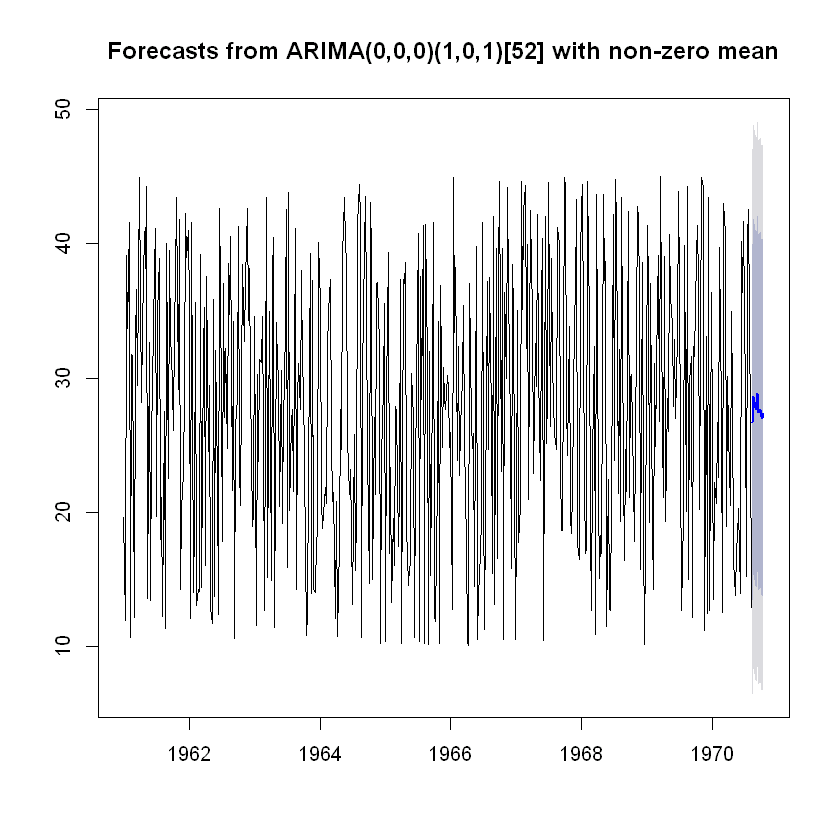

In [38]:
plot.forecast(forecast.Arima(myarima, h = 10))